# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


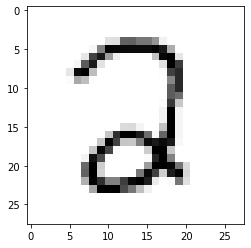

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23394065146771142
train accuracy is: 0.7344349858120514, test accuracy is 0.7227822580645161


Epoch 10 Loss 0.09932906593662576
train accuracy is: 0.913536972124854, test accuracy is 0.9188508064516129


Epoch 20 Loss 0.058925459611681386
train accuracy is: 0.9378234017693207, test accuracy is 0.9445564516129032


Epoch 30 Loss 0.04590084107919064
train accuracy is: 0.9480053413453514, test accuracy is 0.9566532258064516


Epoch 40 Loss 0.039500813986328244
train accuracy is: 0.9545151059923218, test accuracy is 0.9581653225806451


Epoch 50 Loss 0.03561881399817553
train accuracy is: 0.9583541979636121, test accuracy is 0.9601814516129032


Epoch 60 Loss 0.03292525721652379
train accuracy is: 0.9609414121181773, test accuracy is 0.9637096774193549


Epoch 70 Loss 0.030916969010823834
train accuracy is: 0.9644466700050075, test accuracy is 0.9667338709677419


Epoch 80 Loss 0.029329126705207712
train accuracy is: 0.9660323819061927, test accuracy is 0.967741935483871


Epoch 90 Loss 0.028025628265944017
train accuracy is: 0.9680353864129527, test accuracy is 0.9692540322580645


Epoch 100 Loss 0.026919633825985025
train accuracy is: 0.9689534301452178, test accuracy is 0.969758064516129


Epoch 110 Loss 0.025955599237316034
train accuracy is: 0.9702053079619429, test accuracy is 0.969758064516129


Epoch 120 Loss 0.025108221624386463
train accuracy is: 0.971290268736438, test accuracy is 0.96875


Epoch 130 Loss 0.024352567489039283
train accuracy is: 0.9722083124687031, test accuracy is 0.9692540322580645


Epoch 140 Loss 0.023666490583311526
train accuracy is: 0.9735436488065431, test accuracy is 0.9712701612903226


Epoch 150 Loss 0.02303202850059693
train accuracy is: 0.9742113169754631, test accuracy is 0.9737903225806451


Epoch 160 Loss 0.022461194012224996
train accuracy is: 0.9744616925388082, test accuracy is 0.9737903225806451


Epoch 170 Loss 0.021927707241883237
train accuracy is: 0.9748789851443832, test accuracy is 0.9742943548387096


Epoch 180 Loss 0.021430083208574858
train accuracy is: 0.9752962777499583, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.020962296521075487
train accuracy is: 0.9761308629611083, test accuracy is 0.9732862903225806


Epoch 200 Loss 0.020527073970083694
train accuracy is: 0.9767150726089133, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.02011455316838956
train accuracy is: 0.9775496578200634, test accuracy is 0.9747983870967742


Epoch 220 Loss 0.0197193269366282
train accuracy is: 0.9781338674678685, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.019347068005030006
train accuracy is: 0.9784677015523285, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.018987818474460228
train accuracy is: 0.9787180771156735, test accuracy is 0.9753024193548387


0.0319391915145709

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.22174810146585192
train accuracy is: 0.7441996327825071, test accuracy is 0.7762096774193549


Epoch 10 Loss 0.10047444532892326
train accuracy is: 0.914538474378234, test accuracy is 0.9269153225806451


Epoch 20 Loss 0.07756551945887169
train accuracy is: 0.928893340010015, test accuracy is 0.9425403225806451


Epoch 30 Loss 0.06694610132027198
train accuracy is: 0.9369888165581706, test accuracy is 0.9506048387096774


Epoch 40 Loss 0.060559653808045226
train accuracy is: 0.943164747120681, test accuracy is 0.9551411290322581


Epoch 50 Loss 0.05620497850460923
train accuracy is: 0.9465030879652813, test accuracy is 0.9561491935483871


Epoch 60 Loss 0.05300725315316616
train accuracy is: 0.9487564680353864, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.050534399796547474
train accuracy is: 0.9511767651477215, test accuracy is 0.9611895161290323


Epoch 80 Loss 0.04855104762710213
train accuracy is: 0.9522617259222167, test accuracy is 0.9616935483870968


Epoch 90 Loss 0.046915746790129984
train accuracy is: 0.9533466866967117, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.045537884447880914
train accuracy is: 0.9541812719078618, test accuracy is 0.9627016129032258


Epoch 110 Loss 0.04435643726769645
train accuracy is: 0.9548489400767819, test accuracy is 0.9647177419354839


Epoch 120 Loss 0.04332687084125886
train accuracy is: 0.956017359372392, test accuracy is 0.9657258064516129


Epoch 130 Loss 0.04242101595877312
train accuracy is: 0.956851944583542, test accuracy is 0.9662298387096774


Epoch 140 Loss 0.041614265113783404
train accuracy is: 0.957686529794692, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.040890730039191206
train accuracy is: 0.9577699883158071, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.04023613074220495
train accuracy is: 0.958604573526957, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.03964077729208251
train accuracy is: 0.9585211150058421, test accuracy is 0.9672379032258065


Epoch 180 Loss 0.03909483017571177
train accuracy is: 0.9594391587381071, test accuracy is 0.9672379032258065


Epoch 190 Loss 0.03859297478020597
train accuracy is: 0.9599399098647972, test accuracy is 0.9672379032258065


Epoch 200 Loss 0.03812914111161008
train accuracy is: 0.9602737439492572, test accuracy is 0.9667338709677419


Epoch 210 Loss 0.037697937434626586
train accuracy is: 0.9609414121181773, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.03729652982497242
train accuracy is: 0.9616925388082124, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.036921795800498716
train accuracy is: 0.9618594558504423, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03656966968397789
train accuracy is: 0.9620263728926723, test accuracy is 0.9672379032258065


0.05677181537261221

### Comparing results of NN and LR

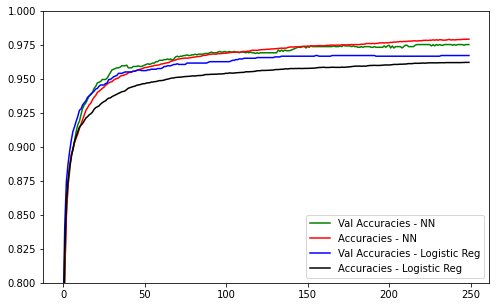

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

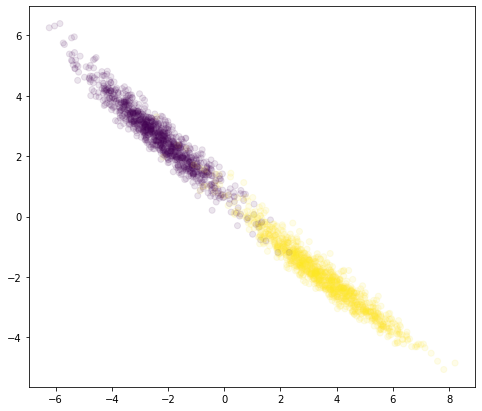

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

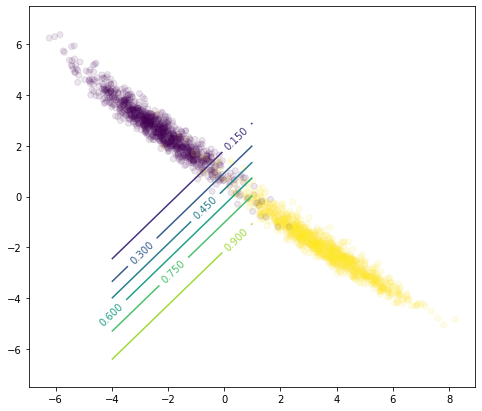

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );